In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from code.fasttext.embedding_utils import TableEncoder, compare_embeddings_of, show_most_similar_rows, drop_columns_with_only_nan

In [349]:
data = {
    'presidents': '/home/giovanni/unimore/TESI/src/data/us_presidents/List_of_presidents_of_the_United_States_1.csv',
    'parks': '/home/giovanni/unimore/TESI/src/data/us_national_parks/List_of_national_parks_of_the_United_States_1.csv',
    'forests': '/home/giovanni/unimore/TESI/src/data/us_national_forests/List_of_national_forests_of_the_United_States_1.csv'
}

In [350]:
presidents_df = pd.read_csv(data['presidents'])
parks_df = pd.read_csv(data['parks'])
forests_df = pd.read_csv(data['forests'])

In [351]:
presidents_df.shape, parks_df.shape, forests_df.shape

((46, 8), (63, 7), (134, 6))

In [352]:
presidents_df.head()

,No.,Portrait,Name\n(Birth–Death),Term,Party,Party.1,Election,Vice President
0,1,NaN,George Washington\n(1732–1799),"April 30, 1789\n–\nMarch 4, 1797",NaN,Unaffiliated,1788–1789\n\n1792,John Adams
1,2,NaN,John Adams\n(1735–1826),"March 4, 1797\n–\nMarch 4, 1801",NaN,Federalist,1796,Thomas Jefferson
2,3,NaN,Thomas Jefferson\n(1743–1826),"March 4, 1801\n–\nMarch 4, 1809",NaN,Democratic-\nRepublican,1800\n\n\n1804,Aaron Burr\n\nGeorge Clinton
3,4,NaN,James Madison\n(1751–1836),"March 4, 1809\n–\nMarch 4, 1817",NaN,Democratic-\nRepublican,1808\n\n1812,"George Clinton\n\nVacant after\nApril 20, 1812..."
4,5,NaN,James Monroe\n(1758–1831),"March 4, 1817\n–\nMarch 4, 1825",NaN,Democratic-\nRepublican,1816\n\n1820,Daniel D. Tompkins


In [353]:
presidents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   No.                 46 non-null     int64  
 1   Portrait            0 non-null      float64
 2   Name
(Birth–Death)  46 non-null     object 
 3   Term                46 non-null     object 
 4   Party               0 non-null      float64
 5   Party.1             46 non-null     object 
 6   Election            46 non-null     object 
 7   Vice President      46 non-null     object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ KB


In [354]:
presidents_df.dropna(axis='columns', how='all', inplace=True)
parks_df.dropna(axis='columns', how='all', inplace=True)
forests_df.dropna(axis='columns', how='all', inplace=True)

In [355]:
tabenc = TableEncoder()

## Comparing Columns

### Presidents VS Parks

In [356]:
def round_to(n, precision):
    if n >= 0 or n < 0:
        correction = 0.5 if n >= 0 else -0.5
        return int(n / precision + correction) * precision
    else:
        return n

def round_to_05(n):
    return float(format(round_to(n, 0.05), ".2f"))

In [357]:
m = pd.merge(
        pd.merge(
        compare_embeddings_of(presidents_df, parks_df, tabenc, 'columns'),
        compare_embeddings_of(presidents_df, parks_df, tabenc, 'columns', add_label=True),
        on=['C1', 'C2'],
        suffixes=['', '_wlabel']
    ),
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'columns', keepnumbers=False),
    on=['C1', 'C2'],
    suffixes=['', '_nonum']
)
    
m['delta1'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))
m['delta2'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

In [358]:
m_pres_vs_parks = m.copy()

### Forests VS Parks

In [360]:
m = pd.merge(
        pd.merge(
        compare_embeddings_of(forests_df, parks_df, tabenc, 'columns'),
        compare_embeddings_of(forests_df, parks_df, tabenc, 'columns', add_label=True),
        on=['C1', 'C2'],
        suffixes=['', '_wlabel']
    ),
    compare_embeddings_of(forests_df, parks_df, tabenc, 'columns', keepnumbers=False),
    on=['C1', 'C2'],
    suffixes=['', '_nonum']
)
    
m['delta1'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))
m['delta2'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

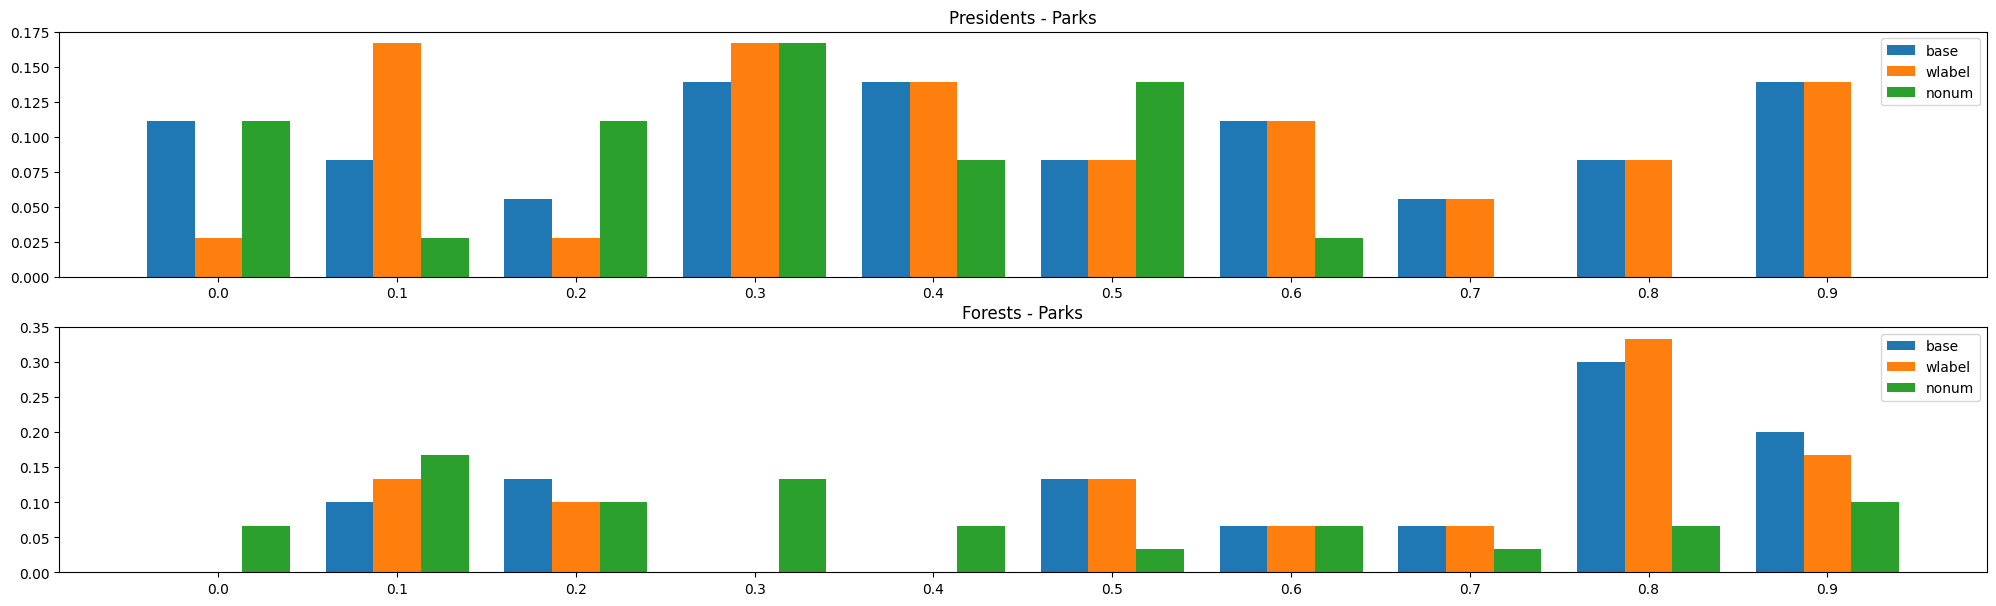

In [403]:
fig, axis = plt.subplots(2, 1, figsize=(20, 6))
fig.tight_layout(h_pad=1.50)
bins = np.arange(0, 1.1, 0.1)

for title, data, ax in zip(('Presidents - Parks', 'Forests - Parks'), (m_pres_vs_parks, m), axis):
    ax.set_xticks(bins)
    ax.hist(
        [
            data['cosine similarity'],
            data['cosine similarity_wlabel'],
            data['cosine similarity_nonum']
        ],
        bins=bins,
        label=['base', 'wlabel', 'nonum'],
        align='left',
        weights=[   # y-axis in [0-1]
            np.ones_like(data['cosine similarity']) / data['cosine similarity'].shape[0],
            np.ones_like(data['cosine similarity_wlabel']) / data['cosine similarity_wlabel'].shape[0],
            np.ones_like(data['cosine similarity_nonum']) / data['cosine similarity_nonum'].shape[0]
            ]
    )
    ax.set_title(title)
    ax.legend()
plt.show()

## Comparing Rows

### Presidents VS Parks

In [93]:
m = pd.merge(
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows', add_label=True),
    on=['R1', 'R2'],
    suffixes=['', '_wlabel']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))

In [94]:
m

,R1,R2,cosine similarity,cosine similarity_wlabel,delta
0,20,30,0.960136,0.89866,0.061
1,37,19,0.958369,0.909527,0.049
2,37,38,0.955976,0.907676,0.048
3,37,33,0.955683,0.908834,0.047
4,12,30,0.954228,0.898887,0.055
...,...,...,...,...,...
2893,11,25,0.786609,0.759704,0.027
2894,14,17,0.785837,0.777775,0.008
2895,0,17,0.783606,0.761486,0.022
2896,11,17,0.774685,0.764045,0.011


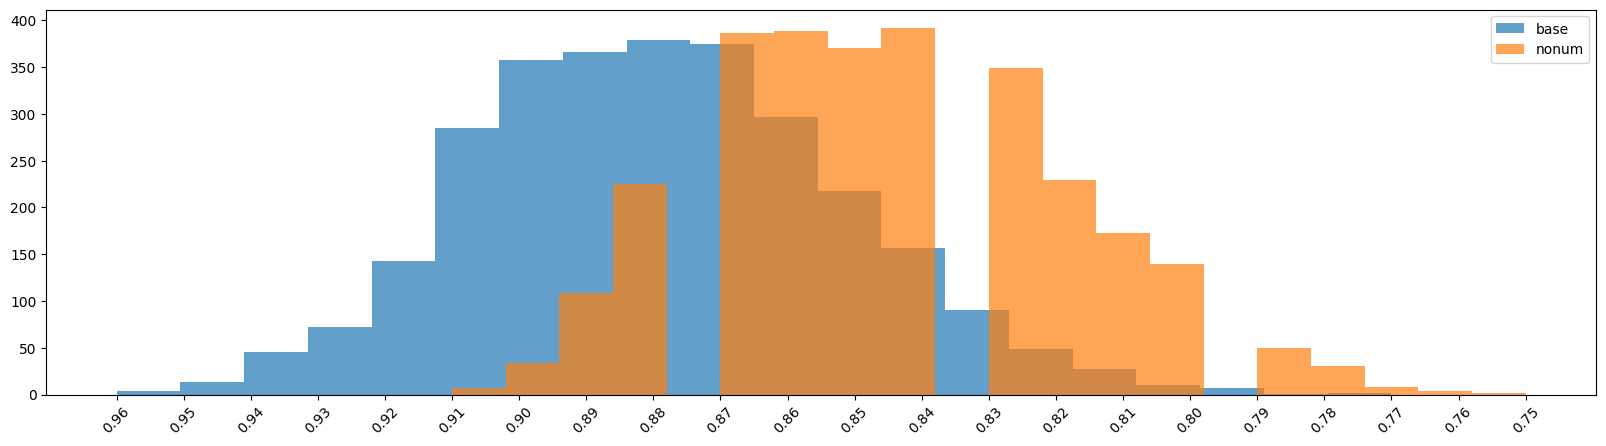

In [95]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_wlabel'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [96]:
m = pd.merge(
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(presidents_df, parks_df, tabenc, 'rows', keepnumbers=False),
    on=['R1', 'R2'],
    suffixes=['', '_nonum']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

In [97]:
m

,R1,R2,cosine similarity,cosine similarity_nonum,delta
0,20,30,0.960136,0.465785,0.494
1,37,19,0.958369,0.44322,0.515
2,37,38,0.955976,0.433126,0.523
3,37,33,0.955683,0.460699,0.495
4,12,30,0.954228,0.461717,0.493
...,...,...,...,...,...
2893,11,25,0.786609,0.415172,0.371
2894,14,17,0.785837,0.475801,0.310
2895,0,17,0.783606,0.427507,0.356
2896,11,17,0.774685,0.408577,0.366


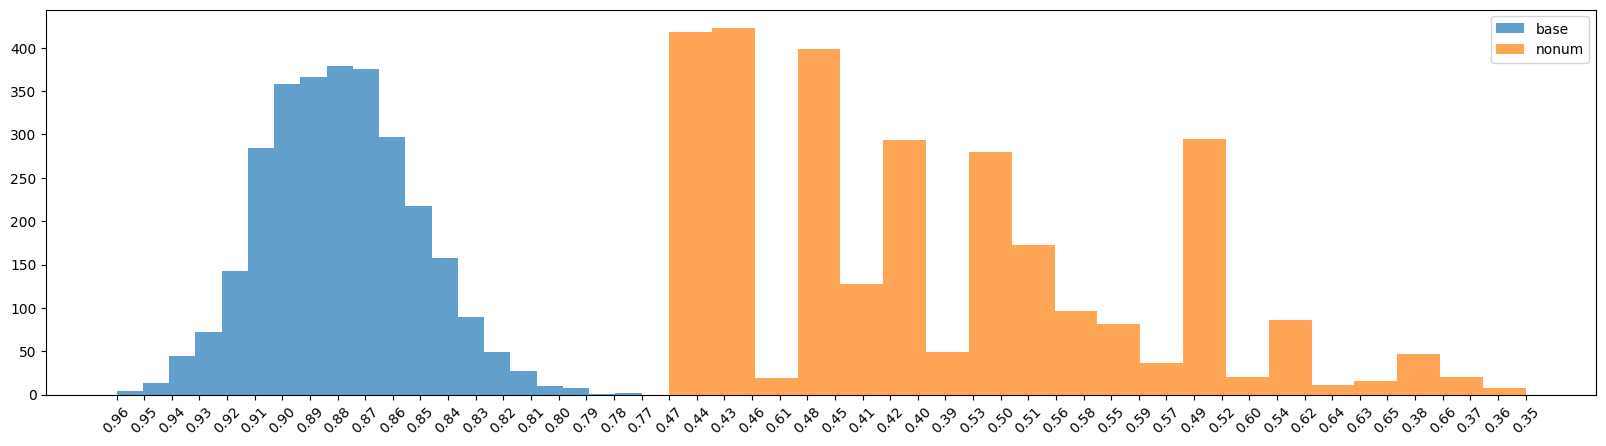

In [98]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_nonum'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [99]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity']], presidents_df, parks_df, 1)

#0: 0.9601359545345971
	20: 21 Chester A. Arthur
(1829–1886) September 19, 1881
–
March 4, 1885 Republican – Vacant throughout
presidency
	30: Hawaiʻi Volcanoes ‡ Hawaii
19°23′N 155°12′W﻿ / ﻿19.38°N 155.20°W﻿ / 19.38; -155.20﻿ (Hawaiʻi Volcanoes) August 1, 1916 344,812.18 acres (1,395.4 km2) 1,580,961 This park on the Big Island protects the Kīlauea and Mauna Loa volcanoes, two of the world's most active geological features. Diverse ecosystems range from tropical forests at sea level to barren lava beds at more than 13,000 feet (4,000 m). (WHS) (BR)



In [100]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity_nonum']], presidents_df, parks_df, 1)

#0: 0.4657845232028505
	20: 21 Chester A. Arthur
(1829–1886) September 19, 1881
–
March 4, 1885 Republican – Vacant throughout
presidency
	30: Hawaiʻi Volcanoes ‡ Hawaii
19°23′N 155°12′W﻿ / ﻿19.38°N 155.20°W﻿ / 19.38; -155.20﻿ (Hawaiʻi Volcanoes) August 1, 1916 344,812.18 acres (1,395.4 km2) 1,580,961 This park on the Big Island protects the Kīlauea and Mauna Loa volcanoes, two of the world's most active geological features. Diverse ecosystems range from tropical forests at sea level to barren lava beds at more than 13,000 feet (4,000 m). (WHS) (BR)



### Forests VS Parks

In [101]:
m = pd.merge(
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows', add_label=True),
    on=['R1', 'R2'],
    suffixes=['', '_wlabel']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_wlabel']).apply(lambda x: format(x, ".3f"))

In [102]:
m

,R1,R2,cosine similarity,cosine similarity_wlabel,delta
0,76,0,0.98816,0.958921,0.029
1,122,27,0.987506,0.957952,0.030
2,75,7,0.987362,0.958097,0.029
3,122,0,0.98708,0.963102,0.024
4,102,7,0.986979,0.945277,0.042
...,...,...,...,...,...
8437,69,17,0.884381,0.870034,0.014
8438,47,17,0.884346,0.87322,0.011
8439,34,4,0.884227,0.877973,0.006
8440,63,17,0.883879,0.848821,0.035


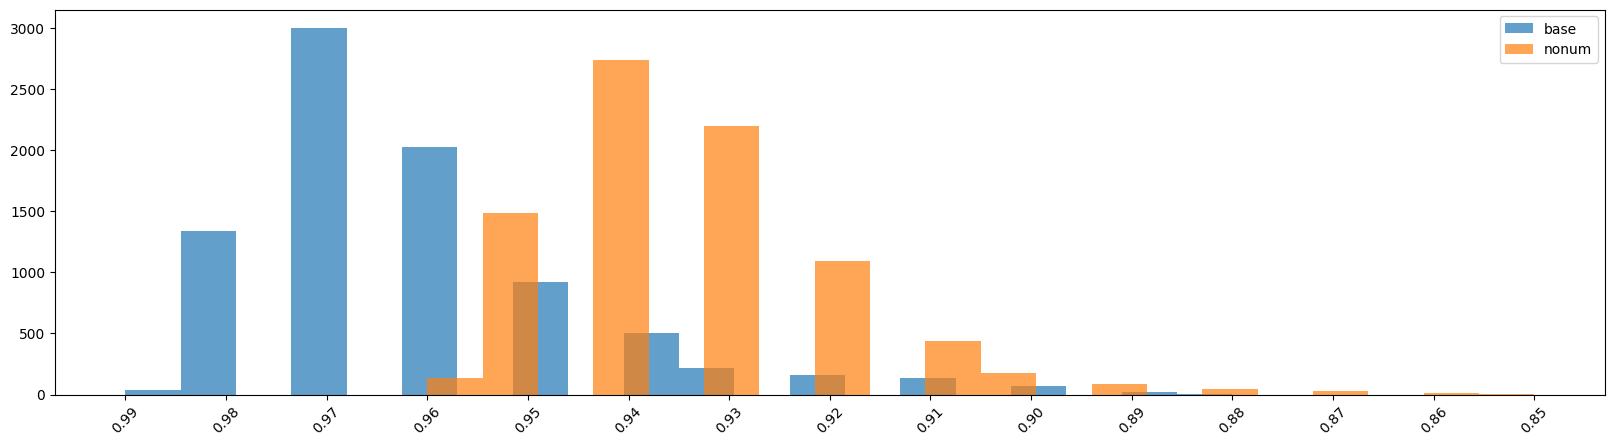

In [103]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_wlabel'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [104]:
m = pd.merge(
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows'),
    compare_embeddings_of(forests_df, parks_df, tabenc, 'rows', keepnumbers=False),
    on=['R1', 'R2'],
    suffixes=['', '_nonum']
)
m['delta'] = (m['cosine similarity'] - m['cosine similarity_nonum']).apply(lambda x: format(x, ".3f"))

In [105]:
m

,R1,R2,cosine similarity,cosine similarity_nonum,delta
0,76,0,0.98816,0.979629,0.009
1,122,27,0.987506,0.971609,0.016
2,75,7,0.987362,0.99003,-0.003
3,122,0,0.98708,0.988227,-0.001
4,102,7,0.986979,0.993218,-0.006
...,...,...,...,...,...
8437,69,17,0.884381,0.858542,0.026
8438,47,17,0.884346,0.91097,-0.027
8439,34,4,0.884227,0.844997,0.039
8440,63,17,0.883879,0.922696,-0.039


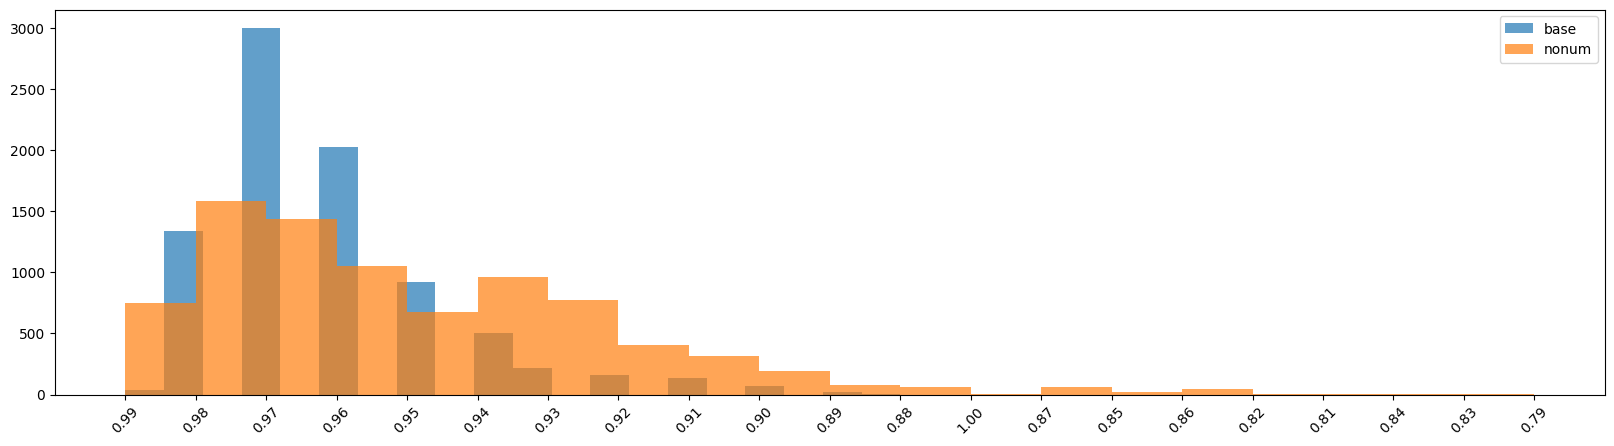

In [106]:
plt.figure(figsize=(20, 5))
plt.hist(m['cosine similarity'].apply(lambda x: format(x, '.2f')).values, label='base', bins=20, alpha=.7)
plt.hist(m['cosine similarity_nonum'].apply(lambda x: format(x, '.2f')).values, label='nonum', bins=20, alpha=.7)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [107]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity']], forests_df, parks_df, 1)

#0: 0.98816006302736
	76: Monongahela West Virginia
38°33′N 79°54′W﻿ / ﻿38.550°N 79.900°W﻿ / 38.550; -79.900﻿ (Monongahela) April 28, 1920 920,583 acres (3,725.5 km2) Monongahela National Forest includes Spruce Knob–Seneca Rocks National Recreation Area and eight wilderness areas. Spruce Knob is the highest point in West Virginia at 4,863 ft (1,482 m), and Seneca Rocks is a 900 ft (270 m) quartzite crag.
	0: Acadia Maine
44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / 44.35; -68.21﻿ (Acadia) February 26, 1919 49,071.40 acres (198.6 km2) 3,970,260 Covering most of Mount Desert Island and other coastal islands, Acadia features the tallest mountain on the Atlantic coast of the United States, granite peaks, ocean shoreline, woodlands, and lakes. There are freshwater, estuary, forest, and intertidal habitats.



In [108]:
show_most_similar_rows(m[['R1', 'R2', 'cosine similarity_nonum']], forests_df, parks_df, 1)

#0: 0.9796294280140625
	76: Monongahela West Virginia
38°33′N 79°54′W﻿ / ﻿38.550°N 79.900°W﻿ / 38.550; -79.900﻿ (Monongahela) April 28, 1920 920,583 acres (3,725.5 km2) Monongahela National Forest includes Spruce Knob–Seneca Rocks National Recreation Area and eight wilderness areas. Spruce Knob is the highest point in West Virginia at 4,863 ft (1,482 m), and Seneca Rocks is a 900 ft (270 m) quartzite crag.
	0: Acadia Maine
44°21′N 68°13′W﻿ / ﻿44.35°N 68.21°W﻿ / 44.35; -68.21﻿ (Acadia) February 26, 1919 49,071.40 acres (198.6 km2) 3,970,260 Covering most of Mount Desert Island and other coastal islands, Acadia features the tallest mountain on the Atlantic coast of the United States, granite peaks, ocean shoreline, woodlands, and lakes. There are freshwater, estuary, forest, and intertidal habitats.

